In [2]:
print("jjjjjjjjj")
#python3 -m venv venv

jjjjjjjjj


In [3]:

import bs4 as bs
import datetime as dt
import os
import yfinance as yf
import pandas as pd 
import numpy as np
import pandas_datareader.data as web
import pickle
import requests
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib import dates, ticker
import math
from matplotlib import style
from pandas.plotting import register_matplotlib_converters
from statistics import *
register_matplotlib_converters()
style.use('ggplot')


In [5]:

start = dt.datetime(2018, 2, 26, 12)
end = dt.datetime(2018, 2, 26, 20)
#df = pd.read_csv('../Jerry/AMZN.Last227.txt', parse_dates = True, index_col = 0, sep=";", header=None)
df = pd.read_csv('AMZN.Last227.txt', parse_dates = True, index_col = 0, sep=";", header=None)
df.columns = ["Open", "High", "Low", "Close", "Volume"]
df['Adj Close'] = df['Close']
df_ohlc = df['Adj Close'].resample('5Min').ohlc()
df_ohlc.reset_index(inplace=True)
df_ohlc.columns = ["Date", "Open", "High", "Low", "Close"]
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_volume = df['Volume'].resample('5Min').sum()
df_ohlc.head()

,Date,Open,High,Low,Close
0,736751.500000,1506.00,1507.00,1506.00,1507.00
1,736751.503472,1506.41,1507.00,1505.76,1507.00
2,736751.506944,1508.00,1508.89,1508.00,1508.89
3,736751.510417,1508.88,1508.88,1508.00,1508.00
4,736751.513889,1508.58,1509.25,1508.58,1509.25


In [6]:
df2 = df_ohlc
df2['Volume'] = df_volume
df.to_csv('AMZN.csv')


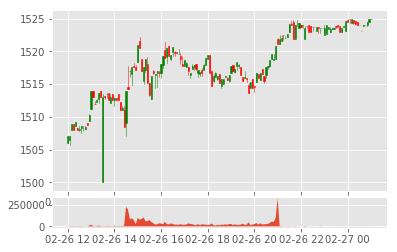

In [28]:
%matplotlib inline
ax1 = plt.subplot2grid((6, 1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5,0), rowspan = 5, colspan = 1, sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values[:, :-1], width=0.002, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

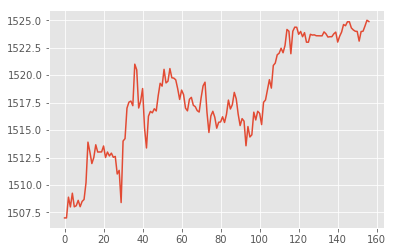

In [35]:
def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    smas = np.convolve(values, weights, 'valid')
    return smas

## function test code
window_width = 1
window_height = 0.5
ma = moving_average(df2['Close'], window_width)
plt.plot(ma)
plt.show()

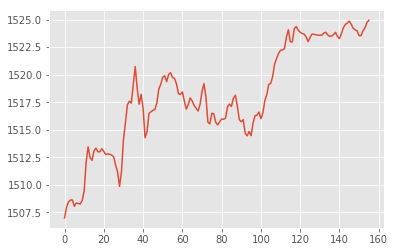

In [36]:
window_width = 2
window_height = 0.5
ma = moving_average(df2['Close'], window_width)
plt.plot(ma)
plt.show()

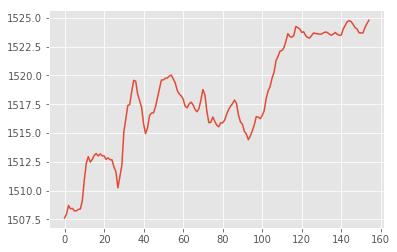

In [37]:
window_width = 3
window_height = 0.5
ma = moving_average(df2['Close'], window_width)
plt.plot(ma)
plt.show()

In [10]:
def window_marker(values, height, width = 1, start = 0, end = 0):
    l = len(values)
    res = []
    if start==0 and end==0:
        start = 0
        end = l - 1
    i = start
    while i <= end - width:
        delta = values[i+width] - values[i]
        if delta >= height:
            res.append('U')
        elif delta > -height:
            res.append('F')
        else:
            res.append('D')
        i = i + 1
    print(res)
    return res

In [11]:
def windowSizeCal(df_ohlc, period, startDate = 0):
    if(startDate != 0):
        endDate = startDate + period
    win = 2*(df_ohlc['High'] - df_ohlc['Low'])
    return [round(mean(win), 3), round(stdev(win), 3)]

## function test code
# [A, B] = windowSizeCal(df_ohlc, 2)
# print(A)
# print(B)

In [17]:
def minEditDistance(word1, word2):
    m = len(word1)
    n = len(word2)
    if m == 0 or m == 0:
        return max(m, n)
    d = [[0 for x in range(n + 1)] for y in range(m+1)]
    for x in range(1, n+1):
        d[0][x] = x;
    for y in range(1, m+1):
        d[y][0] = y;
    for i in range(1, m+1):
        for j in range(1, n+1):
            if word1[i-1] == word2[j-1]:
                c = 0
            else:
                c = 1
            d[i][j] = min(d[i-1][j-1] + c, min(d[i][j-1], d[i-1][j]) + 1)
    return d[-1][-1]

## function test code
# word1 = 'intention'
# word2 = 'execution' minDistance(word1, word2)

In [13]:
res = window_marker(ma, window_height, window_width)

NameError: name 'ma' is not defined

In [ ]:

How to determine the window width and window height?

Use short term historical data, better to be within 1 week
Calculate average 10 minutes (2 blocks) price range, can be used as height
Also, if the day-to-day range change a lot during the week timeframe, need to rethink the sampling range